## Decision Tree - Classification


Karar ağaçlarının ilk hücrelerine kök (root veya root node) denir. Her bir gözlem kökteki koşula göre “Evet” veya “Hayır” olarak sınıflandırılır.

Kök hücrelerinin altında düğümler (interval nodes veya nodes) bulunur. Her bir gözlem düğümler yardımıyla sınıflandırılır. Düğüm sayısı arttıkça modelin karmaşıklığı da artar.

Karar ağacının en altında yapraklar (leaf nodes veya leaves) bulunur. Yapraklar, bize sonucu verir.
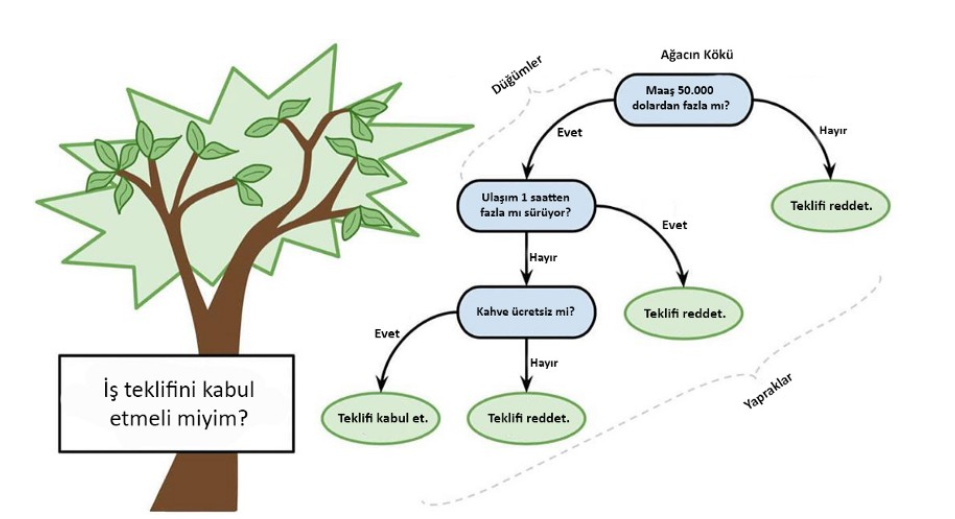

Burada seçeceğimiz kökün veri setimizi olabildiğince çok açıklamasını isteriz. Örneğin yukarıdaki örnek karar ağacına bakarsak, bu kişi için iş teklifinde en önemli etken maaşmış. 

Köke tabi ki biz karar vermiyoruz. Buna karar vermek için çeşitli değerler var. Bunlardan bazıları:

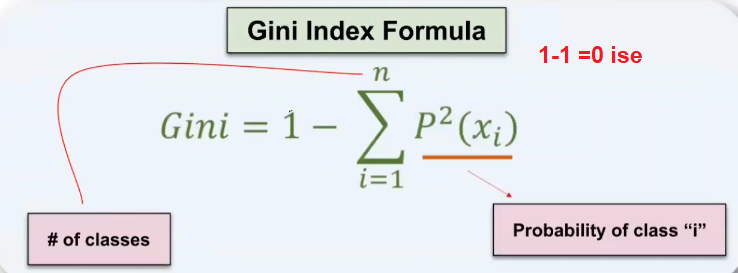

P(Xi), i sınıfının gerçekleşme olasılığıdır. Her sınıf için hesaplanır ve çıkan sonuçların karelerinin toplamı birden çıkartılır. Gini değeri 0 ile 1 arasında bir sonuç alır ve sonuç 0’a ne kadar yakınsa o kadar iyi ayrım yapmış olur.

Gini değeri tüm features lar için hesaplanır ve 0'a en yakın olan kök (root veya root node) olarak belirlenir. 

Gini değeri en küçük olan fetaure ile yapılan ayrımın veri setini diğerlerine göre daha iyi ayrıştırdığını gösteriyor. Bu yüzden kök (root) hücre olarak Maaş düğümünü seçiyoruz.

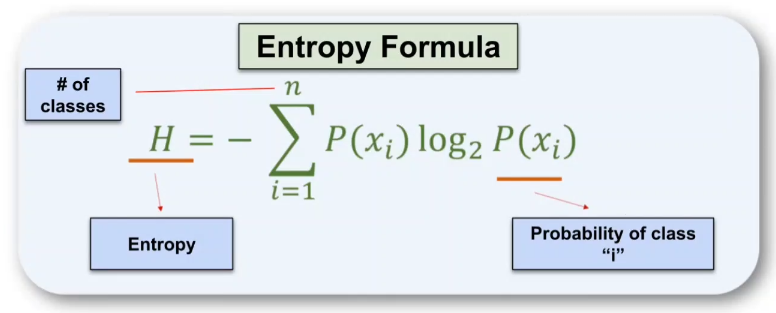

Entropy: Temel fikir, bir gruplamanın bozukluğunu hedef değişkene göre ölçmektir ama bunu log2 tabanında yapar. Kaos olarak nitelenir ve Entropy değeri 0 ile 1 arasında bir sonuç alır ve sonuç 0’a ne kadar yakınsa kaos o kadar az ve o kadar iyi ayrım yapmış olur. 

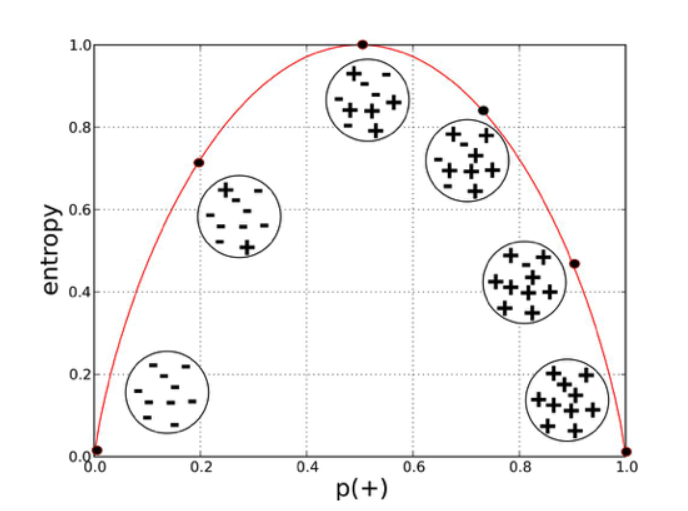

Gini ile arasında çok büyük bir fark yoktur. Entropi daha dengeli bir ağaç çıkarmaya meyilli iken Gini, frekansı fazla olan sınıfı ayrıştırmaya meyillidir.

Hiperparametreler:
Aşırı uyum (overfitting) veya öğrenememe(underfitting) gibi sorunlarla karşı karşıya iseniz hiperparametre değerleri ile biraz oynamanız gerekebilir.

max_depth = Karar Ağacının maksimum derinliğini ifade eder. Değer girilmezse limitsiz olur. Model overfit(aşırı uyum) olmuşsa düşürülmesi gerekir.

min_samples_split = Bir düğümün bölünmeden önce sahip olması gereken minimum örnek sayısıdır.

min_samples_leaf = Bir yaprağın sahip olması gereken minimum örnek sayısıdır.

min_weight_fraction = min_samples_leaf’e benzer.Ağırlıklı örneklerin, toplam örnekler içerisindeki oranı. Ağacın dengeli gitmesi için kullanılır.

max_leaf_nodes = Maksimum yaprak sayısı.

max_features = En iyi bölünmeyi ararken göz önünde bulundurulması gereken featureların sayısı.

https://medium.com/deep-learning-turkiye/karar-a%C4%9Fa%C3%A7lar%C4%B1-makine-%C3%B6%C4%9Frenmesi-serisi-3-a03f3ff00ba5

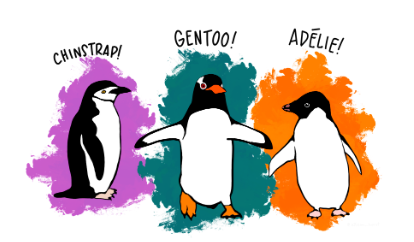

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

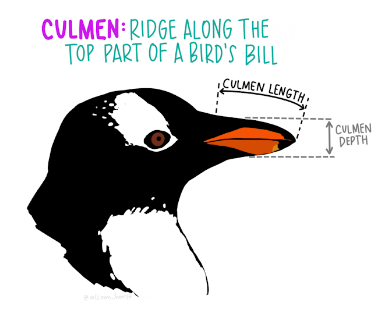

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


info ya baktığımızda missing value lar olduğunu görebiliyoruz.

In [4]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

mean, %50 ve std değerlerine baktığımızda featuresların dağılımı normal dağılım sergiliyor

In [5]:
df.isnull().sum()                       # null değerleri görüyoruz

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.isnull().sum().sum()                # toplam null değer sayımız. null değerleri inceleyerek değiştiredebiliriz ama burada
                                       # eda süreci ile ilgilenmiyoruz. verinin durumuna göre düzenlenebilir

18

In [7]:
df = df.dropna()                       # null değerleri drop ediyoruz

In [8]:
df.info()                              # drop sonrası observation sayımız 344' e düştü. toplam 18 null değerimiz vardı, 
                                       # 10 observation silinmiş oldu. demekki ortak satırlarda null değerler varmış

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [10]:
df["species"].unique()                          # penguen cinsleri

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [11]:
df["island"].unique()                           # ada isimleri

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df["sex"].unique()                              # cinsiyette male, female dışında "." olarak yer alan bir değer var.  

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df[df["sex"]== "."]                             # cinsiyette "." olan satırları getiriyoruz

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

### cinsiyet değeri "." olan observation bir adet. drop edebiliriz ama burada değişiklik yapma durumunu görüyoruz

In [14]:
df[df.species =="Gentoo"].groupby("sex").describe().T   # Gentoo ları sex e göre gruplandırıp describe yapıyoruz
                                                        # sex değeri "." olan değer yerine male mi female mi yazabiliriz ?

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

yukarıda 4 features ın istatiksel verilerini inceleyerek sex değeri "." olan sütüundaki değerleri karşılaştırdık. culmen_depth_mm 15.7 değerinin female cinsiyete sahip olanlarının min ve max olarak alabilecekleri değer aralığının dışında olduğunu gördüğümüz için, "." yerine male yazma kararı aldık.

In [18]:
df.loc[336, "sex"] = "MALE"          # "." değerinin yer aldığı observation index değeri 336. "sex" değerini "MALE" yapıyoruz

In [19]:
df.loc[336, "sex"]

'MALE'

## Visualization

In [20]:
df["species"].value_counts(normalize=True)         

Adelie       0.437126
Gentoo       0.359281
Chinstrap    0.203593
Name: species, dtype: float64

türlerimizin sayılarına baktığımızda; veri sayımız az olduğu için unbalance durum olabilir diyebiliriz ama bunu modele sokmadan tam olarak anlayamayız

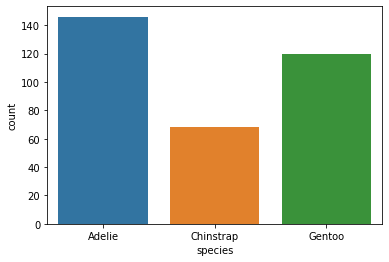

In [21]:
sns.countplot(x="species", data = df);
plt.show()

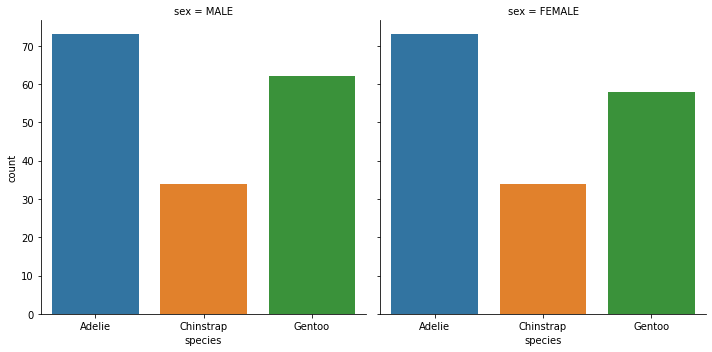

In [22]:
sns.catplot(x='species', data=df, kind='count', col='sex' )
plt.show() 

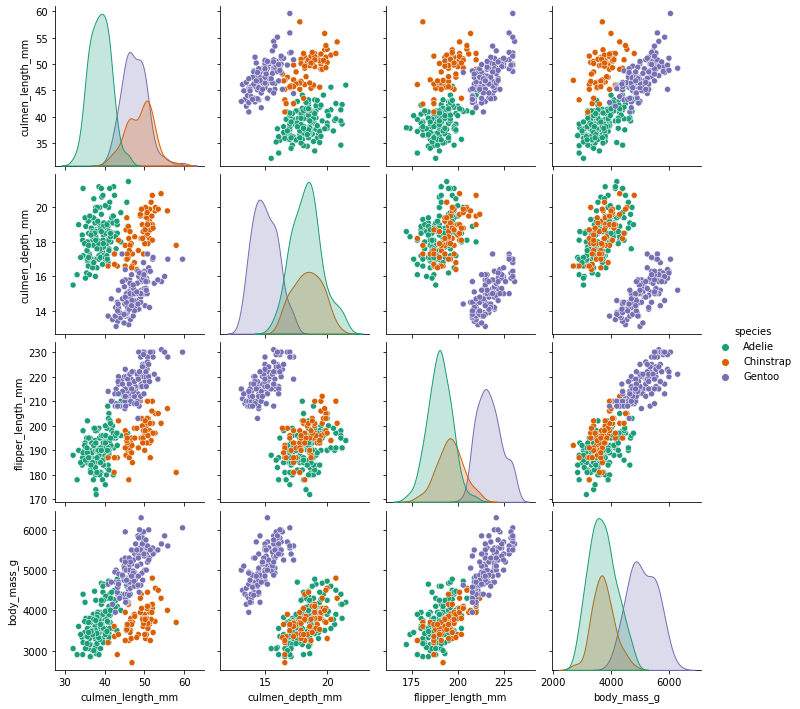

In [26]:
sns.pairplot(df,hue='species',palette='Dark2');

pairplot la baktığımızda;

Gentou nun kolay ayrıştırılabildiğini, Chinstrap ve Adelie nin de bazı değerler ile ayrıştırılabildiğini görüyoruz. 

In [24]:
!pip install plotly

maksimum 3 boyutlu olarak grafiksel gösterime bakabiliyoruz. bu nedenle 3 fetaures değerini baz alarak plotly ile bakıyoruz

In [31]:
import plotly.express as px 

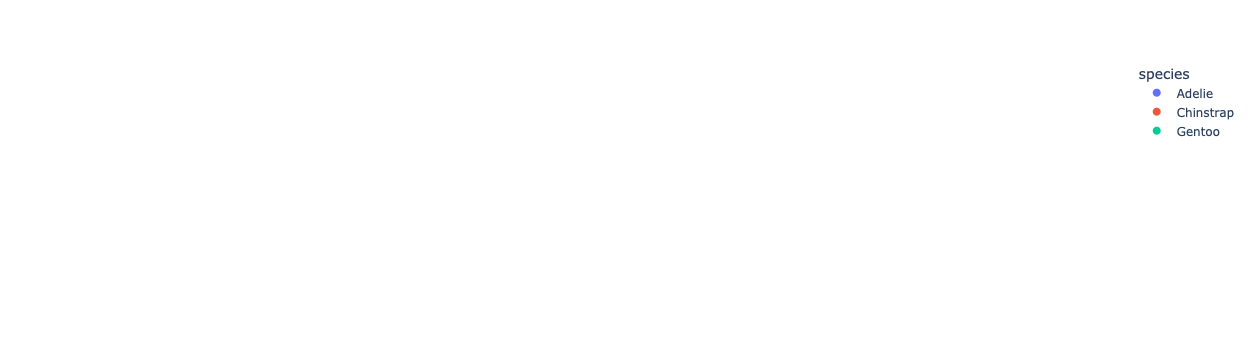

In [32]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [110]:
df.select_dtypes("number")                     # numeric fetaures lar

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

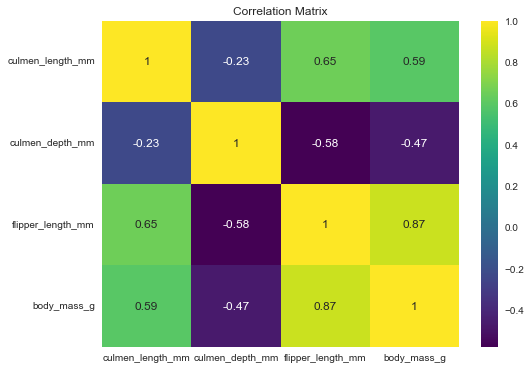

In [111]:
# numeric features ların korelasyon matrisine bakalım

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

* 0.87 body_mass_g ile flipper_lenght_mm arasında pozitif yönlü güçlü bir korelasyon var
* 0.65 culmen_lengt_mm ile flipper_lenght_mm arasında pozitif yönlü orta şiddetten biraz fazla bir korelasyon var
* 0.59 culmen_lengt_mm ile body_mass_g arasında pozitif yönlü orta şiddette bir korelasyon var
* -0.58 flipper_lenght_mm ile culmen_depth_mm arasında negatif yönlü orta şiddette bir korelasyon var
* -0.47 body_mass_g ile culmen_depth_mm arasında negatif yönlü orta şiddette bir korelasyon var

korelasyon değeri 0.9 dan büyük olan değerler olsada tree base modellerde multicolanirty sorunu olmadığından sorun olmaz

## Feature Engineering

In [24]:
df.drop("species", axis =1)               # target variable drop edip, fetaures ları görüyoruz

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [25]:
pd.get_dummies(df.drop("species", axis =1), drop_first =True)  # target variable drop edip, fetaures lara get_dummies yapıyoruz

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

## Train | Test Split

In [36]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Modelling - Decision Tree Classifier

### tree base modellerde scale işlemi yapılmaz. bu nedenle pipeline da yapılmaz

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT_model = DecisionTreeClassifier(random_state=101)

In [41]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [42]:
y_pred = DT_model.predict(X_test)

## Model Performance on Classification Tasks

In [43]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

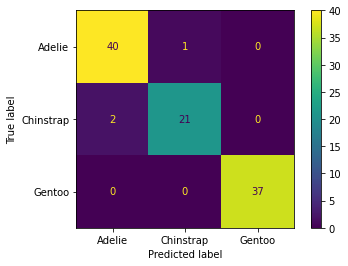

In [45]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

* adelie 40 doğru TP,  1 FN hata
* cinstraptan 21 doğru 2 hata
* gento 37 doğru 0 hata

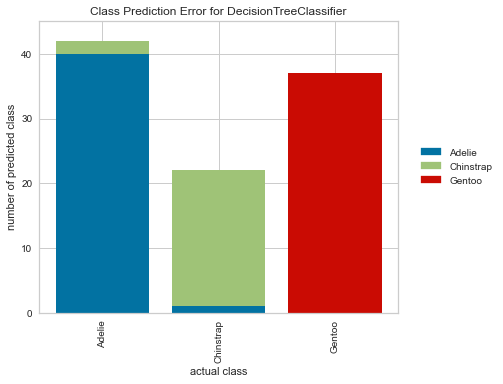

In [36]:
# yukarıdaki confusion_matrix'in grafiksel gösterimi diyebiliriz

from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [46]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



train seti score ları overfit gibi duruyor fakat test seti scoreları ile dengeli olduğu için overfitten bahsedemeyiz. datamız güzel olduğu için bu sonuçları alıyoruz.

## Cross Validate

In [58]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [59]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy",           
                                                            "precision_micro", 
                                                            "recall_micro", 
                                                            "f1_micro"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.006526    0.006892       0.958333              0.958333   
2   0.003233    0.003450       0.958333              0.958333   
3   0.005361    0.007179       0.916667              0.916667   
4   0.005818    0.020332       0.956522              0.956522   
5   0.003393    0.003189       1.000000              1.000000   
6   0.002456    0.004682       1.000000              1.000000   
7   0.006353    0.004438       1.000000              1.000000   
8   0.003076    0.004336       1.000000              1.000000   
9   0.007523    0.006541       0.869565              0.869565   
10  0.002156    0.003688       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [60]:
df_scores.mean()[2:] 

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

accuracy score değerimiz; precision_micro, recall_micro ve f-1_micro değeri ile aynıdır. bir nevi bunu görebilmek için hepsini görmek istedik. yukardaki df dede görülüyor. accuracy değeri yeterli

## Feature Importances

In [61]:
DT_model.feature_importances_             # gini ile belirliyor (shift/tab yaparsak görebiliriz)

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [62]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
culmen_depth_mm              0.052893
island_Dream                 0.078360
culmen_length_mm             0.325918
flipper_length_mm            0.542829

features ların modelimiz için ne kadar önemli olduğunu % lik olarak gösteriyor. flipper_lenght_mm feature ı bizim en belirleyici fetaure ımız. %54 ü tek başına ayırabiliyor

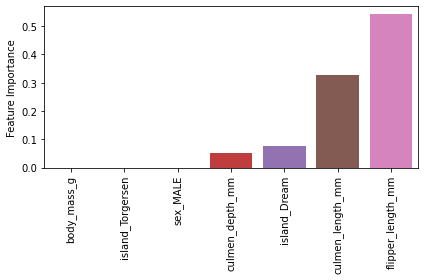

In [63]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

bazen bir feature öyle baskın olur ki diğerlerini gölgeler.. bu çok sık rastlanan bir durum olmayabilir..  bu örnekte diğer feature ları baskıladı..  bu örnek extraordinary bir durum..   her zmaan böyle olmasını beklemeyiz
en baskın fetaure ı drop ederek score lara tekrar bakıyoruz

örnek olarak kadın ve erkeklerin vücut ölçülerinin yer aldığı veriler olsun, omuz genişliği, göğüs genişliği, basel genişliği vb gibi, bu verlerin yanına sakal yada bıyık olma durumunu eklersek tek başına bu features ayrım yapabilir.

## Drop most important feature

In [52]:
X2 = X.drop(columns = ["flipper_length_mm"]) 

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [54]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [55]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [56]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [64]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", 
                                                              "precision_micro", 
                                                              "recall_micro", 
                                                              "f1_micro"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.008303    0.009330       1.000000              1.000000   
2   0.006891    0.004338       1.000000              1.000000   
3   0.003228    0.004921       0.958333              0.958333   
4   0.002180    0.004408       1.000000              1.000000   
5   0.006743    0.009441       1.000000              1.000000   
6   0.003754    0.017157       1.000000              1.000000   
7   0.002259    0.003223       1.000000              1.000000   
8   0.002582    0.004046       1.000000              1.000000   
9   0.002226    0.005089       1.000000              1.000000   
10  0.005034    0.012622       0.956522              0.956522   

    test_recall_micro  test_f1_micro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.958333       0.958333  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           0.956522       0.956522

In [45]:
df_scores.mean()[2:] 

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

most important feature olarak bulduğumuz flipper_lenght_mm yi drop edip sonrasında bulduğumuz score lar ile önceki score ları karşılaştırdığımızda, drop sonrası aldığımız score lar daha başarılı çıktı. most important fetaure modelde baskın olduğu için başarı oranını azda olsa düşürmüş oluyor bunu görmüş olduk. nadiren karşılaşılan bir durumdur. deneyerek score karşılaştırarak best practise bulmaya çalışıyoruz

In [65]:
from sklearn.metrics import make_scorer

#target variable daki herbir class için ayrı ayrı score ları görmek istersek
# burda adelie, chinstrap ve gentoo için bulduğu precision scoreları ortalamasını yukardaki score larda yazar

In [66]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie'   : make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie'       : make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap'   : make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap'       : make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo'   : make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo'       : make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [67]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

In [68]:
from sklearn.tree import plot_tree

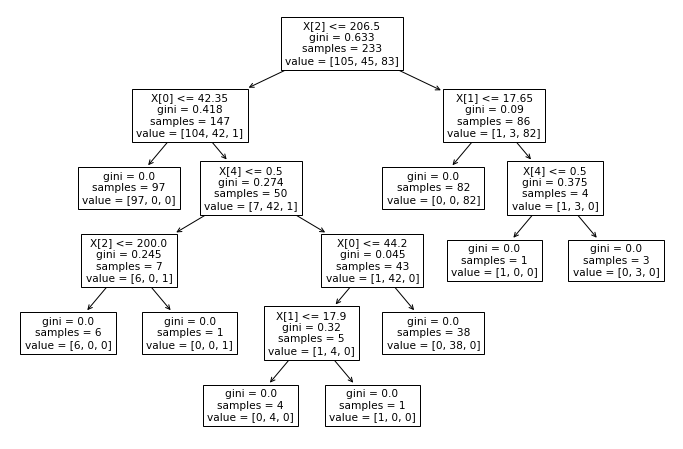

In [69]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);
plt.show()

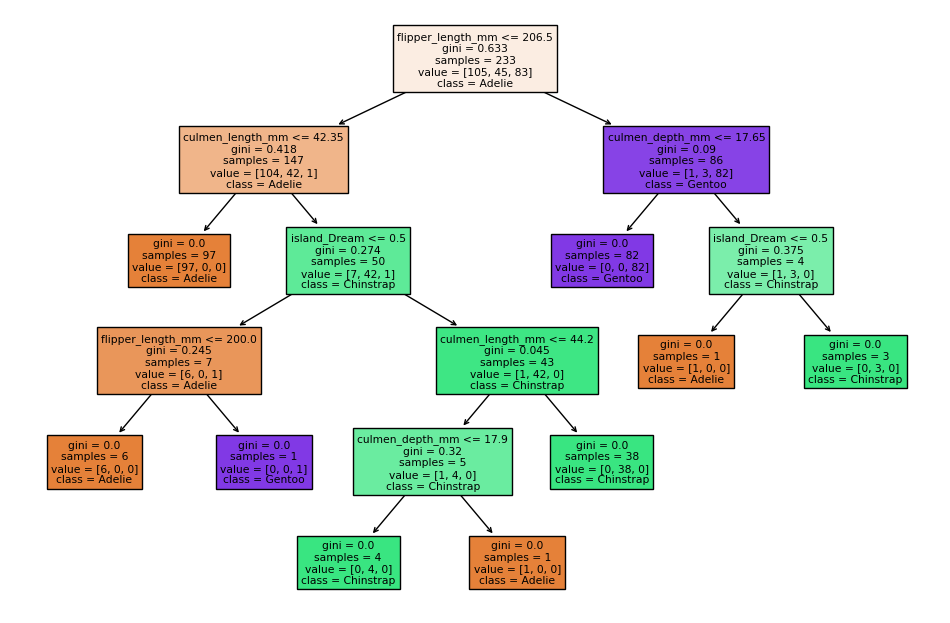

In [70]:
# yukardaki gösterimi modifiye ediyoruz

plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, class_names=df.species.unique());
plt.show()

## Understanding Hyperparameters
### Max depth
* Ağacın maksimum derinliği. default None değerdir, None ise, tüm yapraklar saf olana veya tüm yapraklar min_samples_split örneklerinden daha azını içerene kadar node genişletilir.

### min samples split
* Bir node u bölmek için gereken minimum örnek observation sayısı

### min samples leaf
* Bir yaprak ta olması gereken minimum observation sayısı.

In [71]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print()
    print(classification_report(y_test,model_pred))
    print()
    
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print()
    print(classification_report(y_train,model_train_pred))
    
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model, filled = True, feature_names = X.columns, class_names = df.species.unique());

In [98]:
pruned_tree = DecisionTreeClassifier(max_depth = 3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=101)

max_dept default değeri none dır. yani if else ler ile sonuna kadar ayrıştırmaya çalışır. farklı değerler deneyerek leaf lerde oluşan sonuçları inceleyerek farkı görebiliriz 

max_dept ile tahminlerimize hata ekliyerek train seti score larını bozarak test seti score larını iyiliştiriyoruz. max_dept belirlediğimizde modelimiz o derinliğin altına inemiyor ve tahminlerinde hatalar da olmuş oluyor.

Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101


Train Set
[[104   1   0]
 [  0  45   0]
 [  1   0  82]]

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



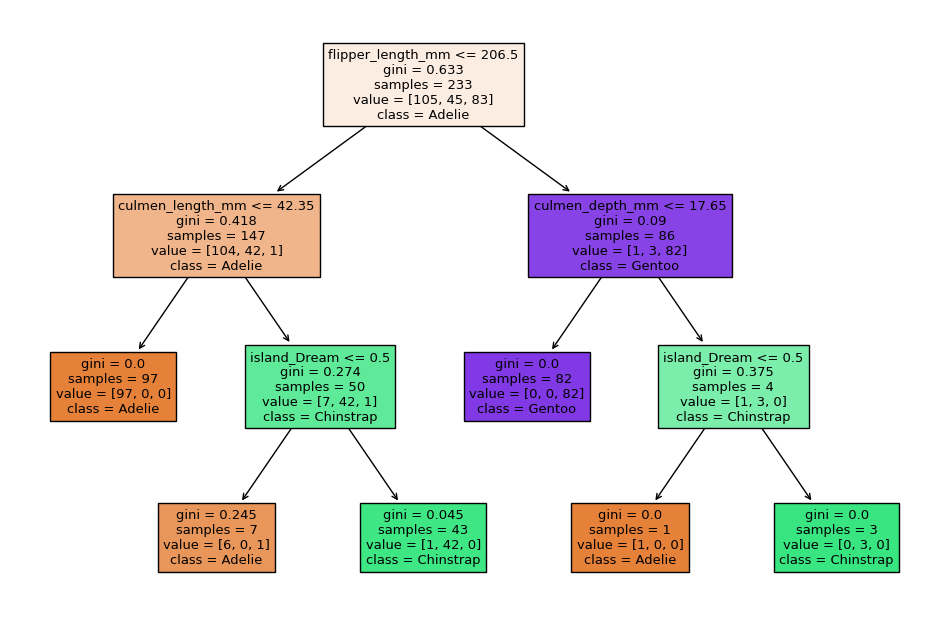

In [99]:
report_model(pruned_tree)

In [74]:
pruned_tree = DecisionTreeClassifier(min_samples_split = 45, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=45, random_state=101)

min_samples_split ayrıştırmak için düğümde olması gereken min gözlem sayısını belirtir. default değer 2 dir. yazılan değer olana kadar node ları bölmeye çalışır. farklı değerler yazarak incelenebilir

Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101


Train Set
[[103   2   0]
 [  0  45   0]
 [  1   0  82]]

              precision    recall  f1-score   support

      Adelie       0.99      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.98      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



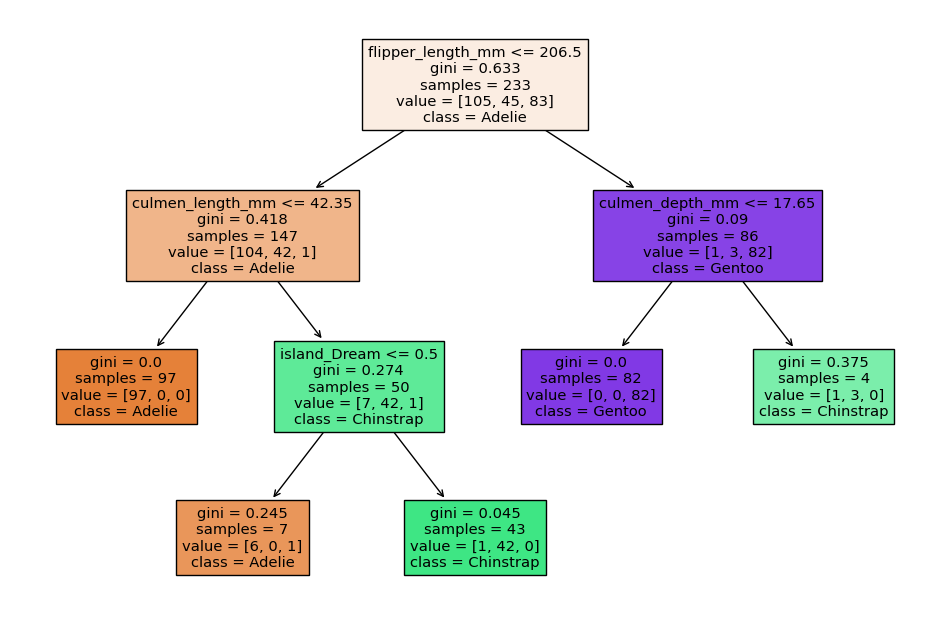

In [75]:
report_model(pruned_tree)

In [76]:
pruned_tree = DecisionTreeClassifier(min_samples_leaf = 2, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=101)

min_samples_leaf so olarak yaprakta kalacak gözlem sayısını belirtir. default değer 1 dir, 1 gözlem kalana kadar ayrıştırmaya devam eder. farklı değerler ile incelenebilir.

Test Set
[[41  0  0]
 [ 2 21  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101


Train Set
[[105   0   0]
 [  2  43   0]
 [  1   0  82]]

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99       105
   Chinstrap       1.00      0.96      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.99      0.98      0.99       233
weighted avg       0.99      0.99      0.99       233



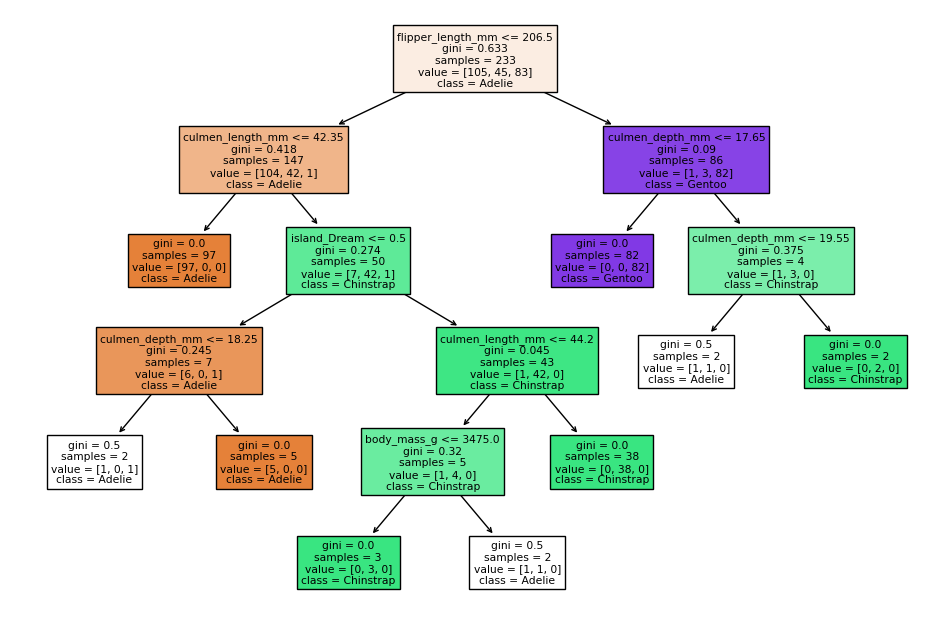

In [77]:
report_model(pruned_tree)

### Max Leaf Nodes

In [78]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 101)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=101)

max_leaf_nodes en sonda kalabilecek maksimum leaf yaprak sayısını ayarlar. default değeri None dır. değer girersek oluşabilecek yaprak sayısı kısıtlanmış olur 

Test Set
[[41  0  0]
 [ 1 22  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101


Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



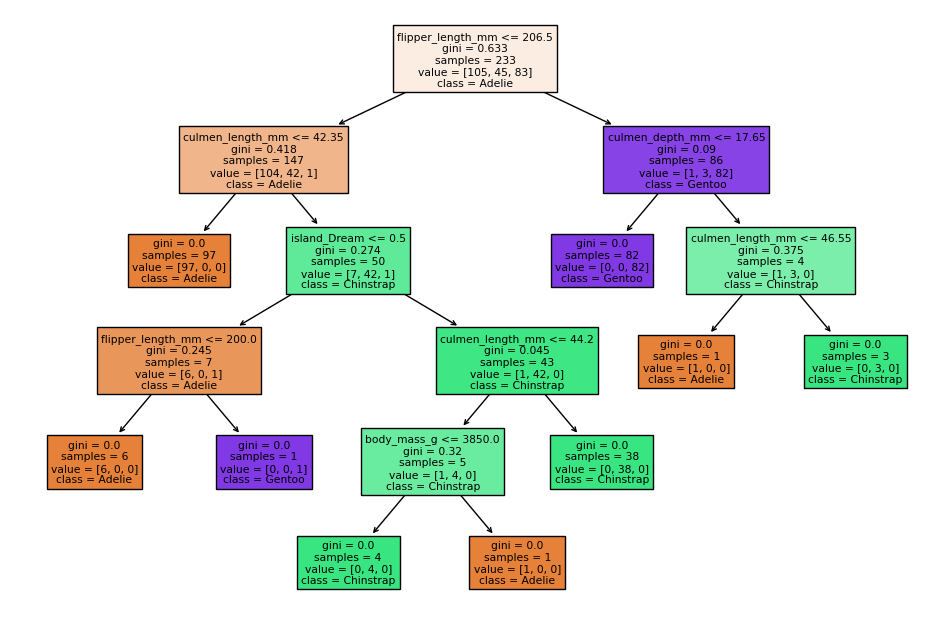

In [79]:
report_model(pruned_tree_2)

## Criterion

In [80]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

# bölme kriteridir. gini = 0 ise hepsi aynı sınıftır.
# Entropi daha dengeli bir ağaç çıkarmaya meyilli iken Gini, frekansı fazla olan sınıfı ayrıştırmaya meyillidir

DecisionTreeClassifier(criterion='entropy', random_state=101)

gini yada entropy değerine kök ve düğümleri belirler. default değer gini dir. 

Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



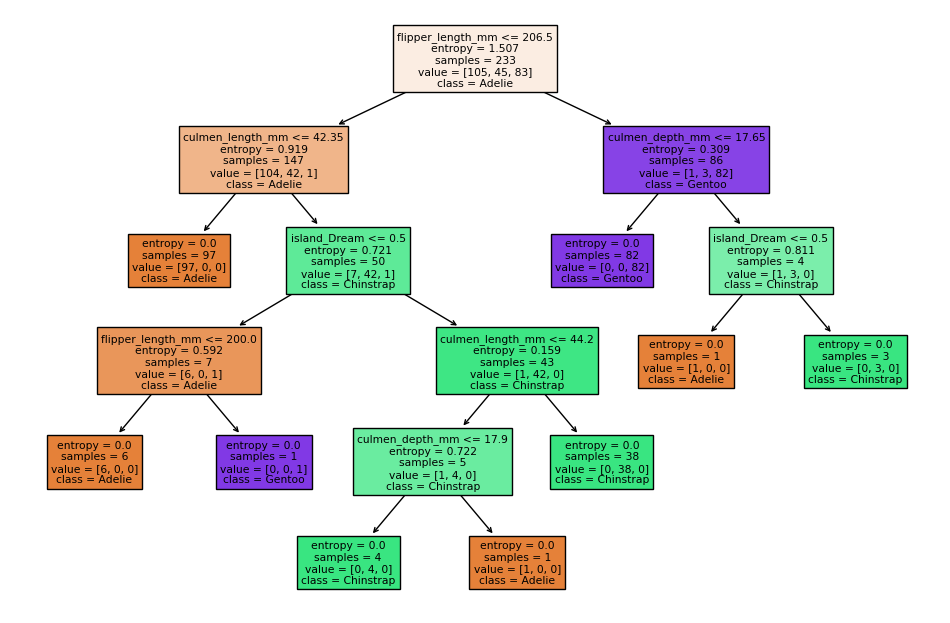

In [81]:
report_model(entropy_tree)

## Max_features, Splitter

In [102]:
tree = DecisionTreeClassifier(splitter = "best", max_features=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=2)

max_features model için random olarak seçilecek maksimum features ı belirtir. default değer None dır. değer girilirse features lardan girilen değer kadar random seçer ve tercih durumuna göre en iyi kökü belirler ve ağaç kurmaya burdan başlar. kök belirlemek için max_fetaures kadar belirler en iyisi ile kök kurar ve ayrıştırır sonraki her safhada tekrar random olarak max_fetaures kadar features secer ve onları ayrıştırır. bu şekilde devam eder  

splitter ise kök veya node lardaki ayrıştırma için belirlenen yöntemdir. default değer best tir. random değerde seçilebilir. burda nasıl ayrıştırma yapacağına dair bir strateji belirler. en iyi ayrıştırma için best, en iyi random ayrıştırma için random seçilir

Test Set
[[39  2  0]
 [ 3 20  0]
 [ 0  0 37]]

              precision    recall  f1-score   support

      Adelie       0.93      0.95      0.94        41
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.95       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.95      0.95      0.95       101


Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



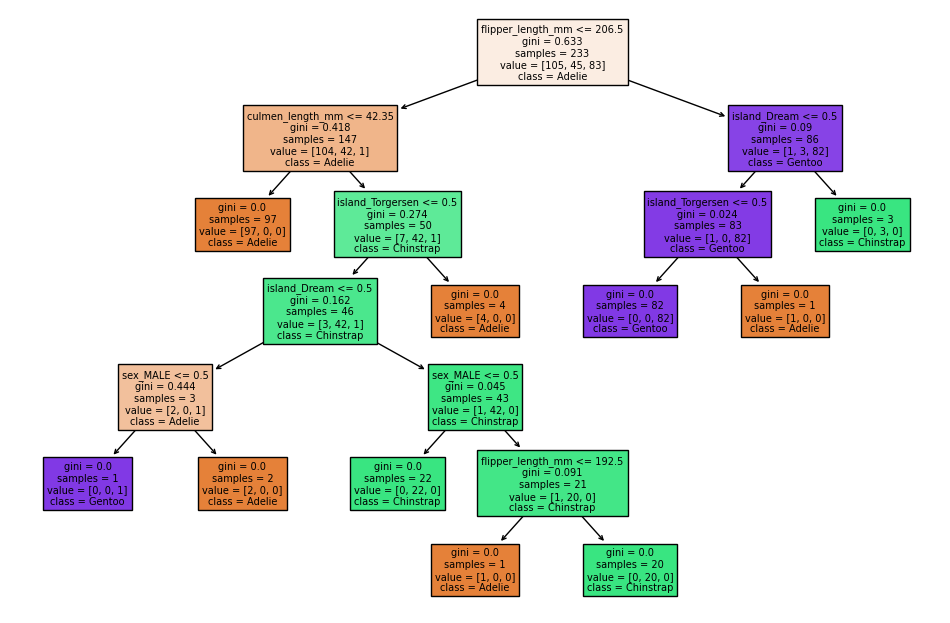

In [103]:
report_model(tree)

## Find Best Parameters

### best parametreleri bulmak için Grid Search kullanıyoruz

In [85]:
from sklearn.model_selection import GridSearchCV

In [106]:
model = DecisionTreeClassifier(random_state=101)

In [107]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

* hyperparametreleri GridSearc e verip skorlara bakabiliriz fakat biraz uzun sürer. 
* max_depth hard , splitter soft budama yapar. Max_dept ile score lar alıp karar vermek faydalı olabilir.
* randomize search cv kullanırsan GridSearchCV random olarak yapar daha az işlem yapabilir.

# # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [108]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [89]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [90]:
grid_model.best_params_             # datamız iyi olduğu için best parametreler default değerler olarak çıktı

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [91]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

